# Introduction

As we have observed, there is a significant imbalance in our target class, which is common when identifying faults, defects, or diseases. For learning purposes, we will create a new dataset by balancing it using a technique called SMOTE Oversampling.

SMOTE (Synthetic Minority Oversampling Technique) is a method for handling imbalanced datasets by generating synthetic samples for the minority class using the nearest neighbors' algorithm. This technique enhances model performance by providing a balanced class distribution without simply duplicating existing data.

Specifically, SMOTE generates new records for the minority class based on an algorithm that examines the characteristics of each record and creates new ones by interpolating feature values using a random factor. This process preserves the relationships between features.

We will utilize a Python library called imblearn, which is specifically designed to address imbalanced datasets.

Other techniques that could be used to handle class imbalance are not suitable for this project for the following reasons:

- **Gathering new or additional data:** The dataset comes from a nationwide survey conducted by an institution that will not repeat the survey in the near future. Their official response can be found here: https://x.com/INEGI_INFORMA/status/1856460837235417554.

- **Noise filtering and dataset cleaning:** This step has already been performed as part of the data preparation process.

- **Undersampling:** Given the limited number of records compared to the population, and the fact that some scenarios have already been filtered out, further reducing the dataset is not a viable option.

Additionally, we will employ a technique in **scikit-learn** that assigns different weights to the classes during evaluation to account for the minority class. This complements SMOTE and helps address class imbalance effectively.


References:

https://learn.microsoft.com/es-es/azure/machine-learning/component-reference/smote?view=azureml-api-2

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



# Data loading

In [1]:
import pandas as pd
df = pd.read_csv('G:\Mi unidad\###_ ML Zoomcamp 2024\enape_post_eda.csv')

In [11]:
df['finished_grade'].value_counts()

finished_grade
True     19585
False      388
Name: count, dtype: int64

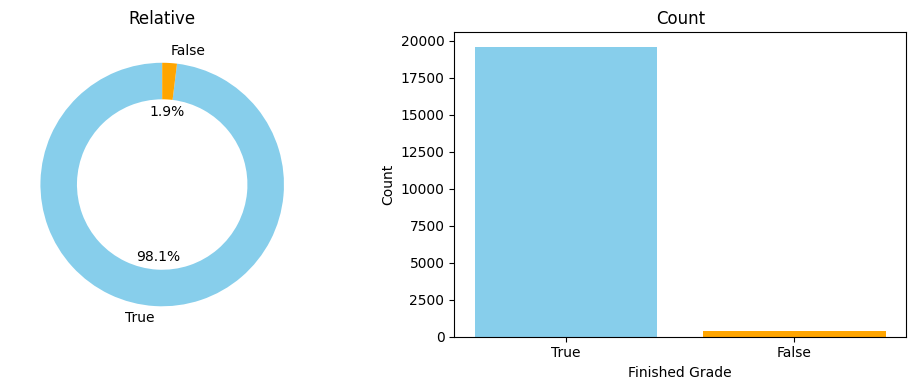

In [8]:
import matplotlib.pyplot as plt

# Calculate the distribution of the target variable
target_counts = df['finished_grade'].value_counts()
labels = target_counts.index.astype(str)  # Convert True/False to strings for labels
sizes = target_counts.values

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Donut Chart
axes[0].pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'orange'], 
    wedgeprops=dict(width=0.3)
)
axes[0].set_title('Relative')

# Bar Chart
axes[1].bar(labels, sizes, color=['skyblue', 'orange'])
axes[1].set_title('Count')
axes[1].set_xlabel('Finished Grade')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


# Create new dataset

In [12]:
from imblearn.over_sampling import SMOTE

X = df.drop('finished_grade', axis=1)  # Features
y = df['finished_grade']              # Target variable

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the result to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  # Retain original column names
y_resampled_df = pd.Series(y_resampled, name='target')         # Convert y to a named Series

# Combine resampled X and y into a single DataFrame
resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Export the resampled DataFrame to a CSV file
resampled_df.to_csv('G:\Mi unidad\###_ ML Zoomcamp 2024\enape_resampled.csv', index=False)

# Display a summary of the resampled dataset
print(f"Original dataset:\n{y.value_counts()}\n")
print(f"Resampled dataset:\n{y_resampled_df.value_counts()}")


ValueError: could not convert string to float: 'male'

The error occurs because the SMOTE method is trying to process categorical or non-numeric data ("male" in this case), which it cannot handle. SMOTE requires all features in X to be numeric (e.g., integers or floats). Here's how you can resolve this issue: